<a href="https://colab.research.google.com/github/Volks44/ML_Lab/blob/main/Task_4_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 4 - Data Visualization

Jose Burgos (BX7FN1)

## Libraries

In [1]:
!pip install datasets --q
from datasets import load_dataset
import pandas as pd
import numpy as np
import plotly.express as px
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.graph_objects as go

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


## Dataset 1

The dataset EDA_on_IMDB_Movies_Dataset is a comprehensive dataset for exploratory data analysis of movies from IMDb. It includes essential features such as movie titles, genres, directors, actors, release years, IMDb ratings, the number of votes, runtime, and Metascore. This dataset is ideal for visualizing trends, understanding genre popularity over time, and examining the relationship between different movie attributes.

In [25]:
df = pd.read_csv("hf://datasets/drossi/EDA_on_IMDB_Movies_Dataset/imdb_top_1000.csv")
df[:5]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


### Bar Chart

In [96]:
genre_counts = df['Genre'].value_counts().head(15).reset_index()
genre_counts.columns = ['Genre', 'Count']

In [102]:
fig = px.bar(genre_counts, x='Count', y='Genre',
             title="Number of Movies by Genre",
             labels={'Count': 'Number of Movies', 'Genre': 'Genre'},
             orientation='h',
             color='Genre')
fig.show()

The graph describes the number of movies for the top 15 Genres.

**Type of graph:** Bar Chart to show a numeralical value for different classes

**Visual Channels:**
*   **Color:** Based in the genre to differenciate them
*   **Position:** Horizontal for a better presentation of the names

As insite of the graph, Drama is included in almost all of the Genres


### Booble Plot

In [ ]:
director_stats = df.groupby('Director').agg(
    average_rating=('IMDB_Rating', 'mean'),
    movie_count=('Series_Title', 'count')
).reset_index()

top_directors = director_stats.sort_values(by='average_rating', ascending=False).head(20)

In [159]:
fig = px.scatter(top_directors, x='average_rating', y='Director',
                 size='movie_count',
                 title="Top 20 Directors by Average IMDb Rating",
                 labels={'average_rating': 'Average IMDb Rating', 'director': 'Director'},
                 hover_name='Director',
                 color='Director',
                 size_max=60)

fig.show()

The graph describes Top 20 Directors by the mean of the IMBd Rating.

**Type of graph:** Bubble plot to show the mean three different features

**Visual Channels:**
*   **Color:** Based in the director to differenciate them
*   **Bubble size:** Shows the number of movies for each Director

As insite of the graph, most of the directors made just one movie with a high IMDb rating that set them in the top 20

## Dataset 2

The dataset yfinance provides access to financial data from Yahoo Finance. It allows users to easily download historical market data, including stock prices, trading volumes, dividends, and stock splits for various financial instruments such as stocks, ETFs, and indices. The data can be retrieved for specific time periods and is essential for conducting financial analysis, backtesting trading strategies, and performing data visualization in finance.

In [188]:
ticker = 'AAPL'  # Apple Inc
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')
data[:5]

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-01-02 00:00:00+00:00,72.876106,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03 00:00:00+00:00,72.167595,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06 00:00:00+00:00,72.742653,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07 00:00:00+00:00,72.400536,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08 00:00:00+00:00,73.565208,75.797501,76.110001,74.290001,74.290001,132079200


### Histogram

In [189]:
data.reset_index(inplace=True)

In [213]:
fig = px.histogram(data, x='Date',
                   y=data['Close']['AAPL'],
                   title='Histogram of AAPL Stock Closing Prices',
                   labels={'x': 'Closing Price', 'y': 'Count'},
                   nbins=50)
fig.show()

The graph behavior of the Close price of Apple Inc.

**Type of graph:** Histogram to show the changes through the time

**Visual Channels:**
*   **Color:** Same color because is the same data
*   **Number of bins:** Divide the data into months

As insite of the graph, the closing price of Apple Inc. was growing evey year since June 2020

### Trend (Line Chart)

In [237]:
dates = pd.to_datetime(data['Date'])

High_prices = data['High']['AAPL']
Low_prices = data['Low']['AAPL']
Open_prices = data['Open']['AAPL']

sma_Open = Open_prices.rolling(window=30).mean()

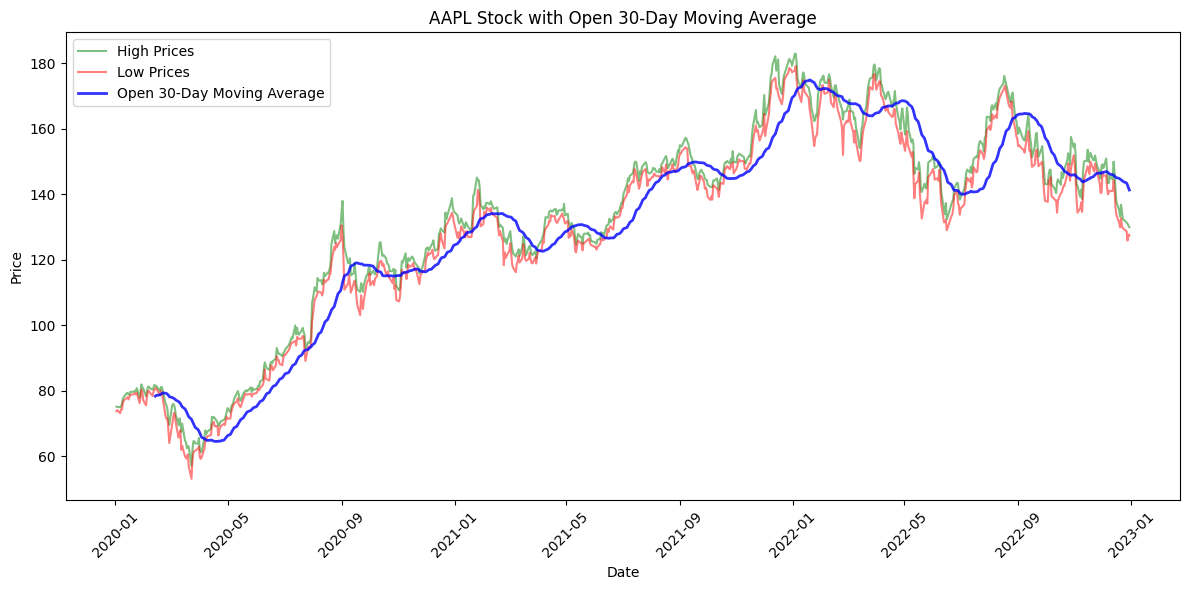

In [246]:
plt.figure(figsize=(12, 6))
plt.plot(dates, High_prices, label='High Prices', color='green', alpha=0.5)
plt.plot(dates, Low_prices, label='Low Prices', color='red', alpha=0.5)
plt.plot(dates, sma_Open, label='Open 30-Day Moving Average', color='blue', linewidth=2,alpha=0.8)
plt.title('AAPL Stock with Open 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

The graph behavior of the High, Low and Open price of Apple Inc.

**Type of graph:** Line chart to show behavior of the market

**Visual Channels:**
*   **Color:** To differenciate the type of data
*   **Lines:** Trend to follow day by day the market and SMA to get the average of the market transactions

As insite of the graph, It's more clear and easy to understand than the histogram

### Candle Bar Chart

In [245]:
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                open=data['Open']['AAPL'],
                high=data['High']['AAPL'],
                low=data['Low']['AAPL'],
                close=data['Close']['AAPL'])])

fig.update_layout(title_text='Candlestick Chart for Apple Inc.',
                  xaxis_rangeslider_visible=False)

fig.show()

The graph behavior of the price of Apple Inc in the stock market.

**Type of graph:** Candle bar chart for a more financial analysis

**Visual Channels:**
*   **Color:** Depends on the market if there were incomes or not

As insite of the graph, the values are represented in a better way for a financial understanding considering all the main features of the data